# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

## Homework 5: Autoencoders 

**Harvard University**<br/>
**Spring 2020**<br/>
**Instructors:** Pavlos Protopapas, Mark Glickman, Chris Tanner<br/>

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- Please restart the kernel and run the entire notebook again before you submit.

<hr style="height:2pt">

In [3]:
import numpy as np
import seaborn as sns

from matplotlib import pyplot
import matplotlib.pylab as plt 
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam, SGD


In [4]:
import datetime
from tensorflow.keras.utils import to_categorical

# np.random.seed(109)
# tf.random.set_seed(100)

<div class="theme"> Overview </div> 


In this homework, we will investigate autoencoders, how they are related to PCA (and in doing so, show that they can be a more powerful extension of this technique), and one possible application of autoencoders for outlier detection.

<div class='exercise'><b> Question 1: Autoencoders and MNIST [50pts total] </b></div>

For this question, we will be using the [MNIST Dataset](https://en.wikipedia.org/wiki/MNIST_database) of handwritten digits, a simple standardized image dataset. The dataset consists of single-channel (black and white) 28x28 images, containing one digit each. We will see if it is feasible to encode (compress, in this case) the images into just 2 dimensions, a substantial compression ratio considering that the original vector has dimension 28x28=784.

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.

**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.

**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes. 

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.

**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.

**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'. 

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?



## Answers

**1.1** [1pts] Load MNIST using `tf.keras.datasets.mnist.load_data()`, saving the training data as `x_train` and `y_train`, and the test data as `x_test`, `y_test`. Normalize the images to the range [0.,1.] by dividing by 255.


In [9]:
# your code here
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train.min(), x_train.max(), x_test.min(), x_test.max()

(0.0, 1.0, 0.0, 1.0)

In [10]:
n_samples, h, w = x_train.shape
print(n_samples, h, w)

n_samples_test, h, w = x_test.shape
print(n_samples_test, h, w)

hw = h*w
print(hw)

60000 28 28
10000 28 28
784


In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**1.2** [1pts] Use `imshow` to show one image of your choice from the train set, specifying `cmap='gray'` to show the image in black and white.


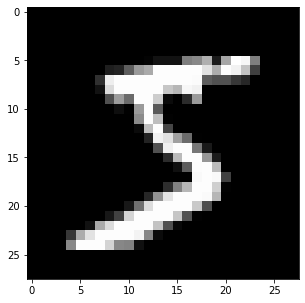

5


In [12]:
# your code here
plt.imshow(x_train[0],cmap='gray')
plt.show()

print(y_train[0])

**1.3** [2pts] Construct and instance of `sklearn`'s `PCA` class, specifying that it only use the first 2 PCA components. Fit to `x_train` (Hint: you will need to use `reshape`), and project `x_train` down to its first 2 PCA components, saving the new array of shape (N,2) to `pca_latent_train`. This is the representation of all the images in `x_train` in a 2D latent space.


In [28]:
# your code here
x_train_flat = x_train.reshape(x_train.shape[0],-1)
x_test_flat = x_test.reshape(x_test.shape[0],-1)
pca_model = PCA(n_components=2).fit(x_train_flat)

pca_latent_train = pca_model.transform(x_train_flat)

In [29]:
print(x_train_flat.shape)
print(x_test_flat.shape)

(60000, 784)
(10000, 784)


**1.4** [2pts] Make a scatterplot of `pca_latent_train` with the point color designated by the corresponding class labels. Pick a reasonable color palette with enough of a contrast to clearly distinguish classes.


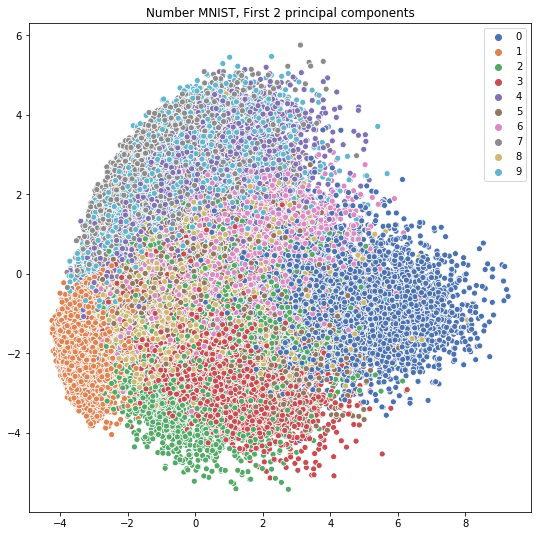

In [211]:
# your code here
np.unique(y_train)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

fig, ax1 = plt.subplots(1,1, figsize=(9,9))
sns.scatterplot(x=pca_latent_train[:,0], y=pca_latent_train[:,1], hue=y_train,
                palette=sns.color_palette("deep", 10),  ax=ax1)
ax1.set_title("Number MNIST, First 2 principal components");

**1.5** [8pts] Linear Autoencoder. Construct an encoder-decoder network with **linear activations** only, and **no biases**. The encoder and decoder should consist of one dense layer each, and the bottleneck dimension should be 2. The encoder and decoder should be their own separate models called `linear_encoder` and `linear_decoder`. Create the full linear autoencoder, call it `lae`, out of the encoder and decoder. Use a mean-squared-error reconstruction loss. Print the `summary()` for both the encoder and decoder networks, as well as the summary for the full linear autoencoder.


In [212]:
print(x_train_flat.shape)
print(x_test_flat.shape)

# x_train_flat = x_train_flat.reshape(-1, hw, 1)
# x_test_flat = x_test_flat.reshape(-1, hw, 1)

# print(x_train_flat.shape)
# print(x_test_flat.shape)


print(y_train.shape)
print(y_test.shape)

### Not for AEs 
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)
# print(y_train.shape)
# print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [234]:
# your code here

input_layer = Input(shape=(hw, ))

latent_view = Dense(2, activation='linear', use_bias=False)(input_layer)

linear_encoder = Model(input_layer, latent_view, name = "linear_encoder")

print(linear_encoder.summary())

### COMPLIE for SAVING

# your code here

optimizer = Adam(lr=1e-2)

metrics = ['accuracy']

linear_encoder.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=metrics)

Model: "linear_encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_76 (Dense)             (None, 2)                 1568      
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________
None


In [235]:
# your code here
# output_layer_shape = Input(shape=(784, 2))
output_layer_shape = Input(shape=latent_view.shape[1:3])
# output_layer = Dense(784, activation='linear')(output_layer_shape)
output_layer = Dense(784, activation='linear', use_bias=False)(output_layer_shape)

linear_decoder = Model(output_layer_shape, output_layer, name='linear_decoder')
print(linear_decoder.summary())



### COMPLIE for SAVING

# your code here

optimizer = Adam(lr=1e-2)

metrics = ['accuracy']

linear_decoder.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=metrics)

Model: "linear_decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_77 (Dense)             (None, 784)               1568      
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________
None


In [236]:
# Assembling autoencoder (Functional)
# aeinput = Input(input_layer)
aeinput = input_layer
encoded = linear_encoder(aeinput)  # The previous models are functions themselves!
decoded = linear_decoder(encoded)
lae = Model(aeinput, decoded, name='linear_autoencoder_model')
# autoencoder_model = Model(input_layer, output_layer, name='autoencoder_model')
print(lae.summary())


Model: "linear_autoencoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
linear_encoder (Model)       (None, 2)                 1568      
_________________________________________________________________
linear_decoder (Model)       (None, 784)               1568      
Total params: 3,136
Trainable params: 3,136
Non-trainable params: 0
_________________________________________________________________
None


**1.6** [4pts] Train your linear autoencoder `lae` on the train data, using `x_test` as validation data. Use enough epochs such that the training loss plateaus. Plot the train loss and validation (equivalent to test, in this case) loss as a function of epoch, in the same figure.


In [237]:
# your code here

# optimizer = RMSprop(lr=1e-2)
optimizer = Adam(lr=1e-2)

#optimizer = RMSprop(lr=1e-2)
# see https://www.tensorflow.org/api_docs/python/tf/keras/metrics
metrics = ['accuracy']
# metrics = ['mean_absolute_error']

# Compile model
# autoencoder_model.compile(optimizer=optimizer,
#               loss='mean_squared_error',
#               metrics=metrics)

# lae.compile(optimizer=optimizer,
#               loss='mean_squared_error',
#               metrics=metrics)

lae.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=metrics)

# lae.compile(optimizer=optimizer,
#               loss='sparse_categorical_crossentropy',
#               metrics=metrics)

# lae.compile(optimizer=optimizer,
#               loss='categorical_crossentropy',
#               metrics=metrics)

In [238]:
np.random.seed(109)
tf.random.set_seed(109)

batch_size = 1048
epochs = 20 # 2 for testing

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
callbacks = [ tf.keras.callbacks.EarlyStopping(
                    # Stop training when `val_loss` is no longer improving
                    monitor='val_loss',
                    # "no longer improving" being further defined as "for at least `patience` epochs
                    patience=10,
                    verbose=5, mode='auto'),
             tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
            ]

history = lae.fit(x_train_flat, x_train_flat, epochs=epochs, batch_size=batch_size, 
                      validation_data=(x_test_flat, x_test_flat), callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 32us/sample - loss: 0.5987 - accuracy: 0.7948 - val_loss: 0.3977 - val_accuracy: 0.7965
Epoch 2/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3902 - accuracy: 0.7981 - val_loss: 0.3849 - val_accuracy: 0.7987
Epoch 3/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3850 - accuracy: 0.7982 - val_loss: 0.3833 - val_accuracy: 0.7969
Epoch 4/20
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3926 - accuracy: 0.7903 - val_loss: 0.3129 - val_accuracy: 0.8001
Epoch 5/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2803 - accuracy: 0.7954 - val_loss: 0.2701 - val_accuracy: 0.7937
Epoch 6/20
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2671 - accuracy: 0.7968 - val_loss: 0.2614 - val_accuracy: 0.7956
Epoch 7/20
60000/60000 [==============================] 

**1.7** [3pts] Compute the `linear_encoder`'s latent space representation of `x_train`, calling the resulting array `lae_latent_train`. Create two scatterplots, side by side, using `subplots`, showing `pca_latent_train` (from **1.4**) and `lae_latent_train`, with points colored according to class label. Don't forget to title the two figures.


In [45]:
####### PLEASE #######################
### LOAD or RELOAD MODELS for future convenience (for consistency)
#### UNCOMMENT BELOW

linear_encoder = tf.keras.models.load_model('models/right_lae_encoder.h5')
linear_decoder = tf.keras.models.load_model('models/right_lae_decoder.h5')
lae = tf.keras.models.load_model('models/right_lae.h5')

In [46]:
# your code here
lae_latent_train = linear_encoder.predict(x_train_flat)

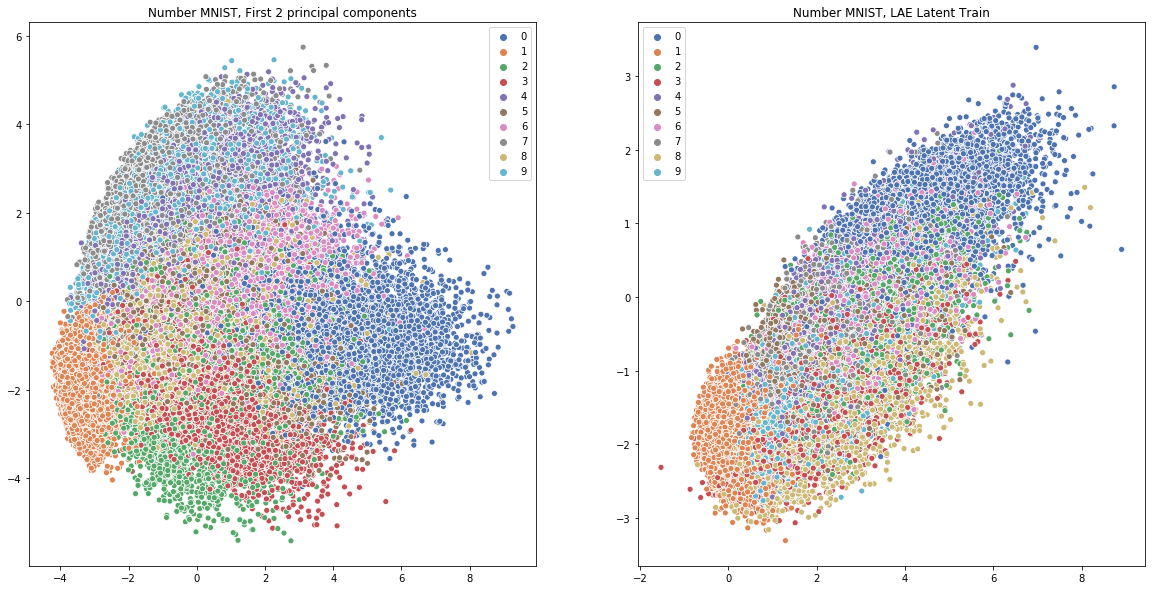

In [47]:
# your code here
np.unique(y_train)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.scatterplot(x=pca_latent_train[:,0], y=pca_latent_train[:,1], hue=y_train,
                palette=sns.color_palette("deep", 10),  ax=ax[0])
ax[0].set_title("Number MNIST, First 2 principal components");

sns.scatterplot(x=lae_latent_train[:,0], y=lae_latent_train[:,1], hue=y_train,
                palette=sns.color_palette("deep", 10),  ax=ax[1])
ax[1].set_title("Number MNIST, LAE Latent Train");

In [241]:
# ## SAVE MODELS (SAVING after checking for satisfactory plots)

# linear_encoder.save('models/right_lae_encoder.h5')
# linear_decoder.save('models/right_lae_decoder.h5')
# lae.save('models/right_lae.h5')

In [48]:
# ### RELOAD MODELS

linear_encoder = tf.keras.models.load_model('models/right_lae_encoder.h5')
linear_decoder = tf.keras.models.load_model('models/right_lae_decoder.h5')
lae = tf.keras.models.load_model('models/right_lae.h5')

**1.8** [3pts] What do you notice about the latent space representations in PCA and the LAE (linear autoencoder)? Does either one do a substantially better job at separating the 10 classes in the 2D latent space? --- *Bonus, but for no additional points: prove a relationship between the latent space representation in PCA and LAE for the same bottleneck dimension.*


*Your answer here*  
  
It seems that, so far, none of the two do a far better job than the other in 2D. This is shown by the numbers not being in distinct clusters as many overlap. However, the LAE may perform better if the size of bottleneck was bigger than 2.
  
With n=3 for PCA, we would be given 3 coordinates, namely, X,Y and Z which could be mapped in 3D. The same could be said for LAE when given 3 neurons as bottleneck as the latent space representation will also give 3 coordinates.

**1.9** [3pts] What do you expect to happen if you added more dense layers (no biases) with only linear activations to your `linear_encoder` and `linear_decoder`? Would you expect a better reconstruction error?


*Your answer here*  
  
Even just adding more dense layers will deepen the model. Since going deeper usually yields better results, I would expect better reconstruction error.

**1.10** [8pts] Construct a nonlinear (regular) autoencoder with at least 2 dense layers, with biases, in both the encoder and decoder parts. Call the encoder network `encoder` and the decoder network `decoder`, and the full autoencoder `ae`. Print the summaries for `encoder`, `decoder`, and `ae`.


In [245]:
# your code here

input_layer = Input(shape=(hw, ))

x = Dense(300, activation='relu', use_bias=True, bias_initializer='zeros')(input_layer)
x = Dense(200, activation='relu', use_bias=True, bias_initializer='zeros')(x)
x = Dense(50, activation='relu', use_bias=True, bias_initializer='zeros')(x)
x = Dense(10, activation='relu', use_bias=True, bias_initializer='zeros')(x)
latent_view = Dense(2, activation='relu', use_bias=True)(x)

encoder = Model(input_layer, latent_view, name = "encoder")

print(encoder.summary())


### COMPLIE for SAVING

# your code here

optimizer = Adam(lr=1e-2)

metrics = ['accuracy']

encoder.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=metrics)

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_83 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_84 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_85 (Dense)             (None, 50)                10050     
_________________________________________________________________
dense_86 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_87 (Dense)             (None, 2)                 22        
Total params: 306,282
Trainable params: 306,282
Non-trainable params: 0
_____________________________________________________

In [246]:
# your code here

output_layer_shape = Input(shape=latent_view.shape[1:3])
x = Dense(10, activation='relu', use_bias=True, bias_initializer='zeros')(output_layer_shape)
x = Dense(50, activation='relu', use_bias=True, bias_initializer='zeros')(x)
x = Dense(200, activation='relu', use_bias=True, bias_initializer='zeros')(x)
x = Dense(300, activation='relu', use_bias=True, bias_initializer='zeros')(x)
output_layer = Dense(784, activation='sigmoid', use_bias=True)(x)

decoder = Model(output_layer_shape, output_layer, name='decoder')
print(decoder.summary())


### COMPLIE for SAVING

# your code here

optimizer = Adam(lr=1e-2)

metrics = ['accuracy']

decoder.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=metrics)

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_88 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_89 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_90 (Dense)             (None, 200)               10200     
_________________________________________________________________
dense_91 (Dense)             (None, 300)               60300     
_________________________________________________________________
dense_92 (Dense)             (None, 784)               235984    
Total params: 307,064
Trainable params: 307,064
Non-trainable params: 0
_____________________________________________________

In [247]:
# your code here

aeinput = input_layer
encoded = encoder(aeinput)  # The previous models are functions themselves!
decoded = decoder(encoded)
ae = Model(aeinput, decoded, name='autoencoder_model')
print(ae.summary())


Model: "autoencoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
encoder (Model)              (None, 2)                 306282    
_________________________________________________________________
decoder (Model)              (None, 784)               307064    
Total params: 613,346
Trainable params: 613,346
Non-trainable params: 0
_________________________________________________________________
None


**1.11** [4pts] Train your autoencoder on `x_train`, using `x_test` as validation data. Train it for a reasonable number of epochs, using your best judgement on what that entails. As usual, plot the train loss and validation loss as a function of epoch.


In [248]:
# your code here

optimizer = Adam(lr=1e-2)

metrics = ['accuracy']

# Compile model
# autoencoder_model.compile(optimizer=optimizer,
#               loss='mean_squared_error',
#               metrics=metrics)

# lae.compile(optimizer=optimizer,
#               loss='mean_squared_error',
#               metrics=metrics)

ae.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=metrics)

# lae.compile(optimizer=optimizer,
#               loss='sparse_categorical_crossentropy',
#               metrics=metrics)

# lae.compile(optimizer=optimizer,
#               loss='categorical_crossentropy',
#               metrics=metrics)

In [249]:
# # your code here
# # tf.compat.v1.set_random_seed(109)


# batch_size = 1048
# epochs = 20 # 2 for testing

# logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
# callbacks = [ tf.keras.callbacks.EarlyStopping(
#                     # Stop training when `val_loss` is no longer improving
#                     monitor='val_loss',
#                     # "no longer improving" being further defined as "for at least `patience` epochs
#                     patience=10,
#                     verbose=5, mode='auto'),
#              tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
#             ]

# history = ae.fit(x_train_flat, x_train_flat, epochs=epochs, batch_size=batch_size, 
#                       validation_data=(x_test_flat, x_test_flat), callbacks=callbacks)



###############################################################################
# EARLY STOPPING DISABLED


batch_size = 1048
epochs = 20 # 2 for testing

history = ae.fit(x_train_flat, x_train_flat, epochs=epochs, batch_size=batch_size, 
                      validation_data=(x_test_flat, x_test_flat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 86us/sample - loss: 0.3152 - accuracy: 0.7695 - val_loss: 0.2471 - val_accuracy: 0.8023
Epoch 2/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2347 - accuracy: 0.7967 - val_loss: 0.2224 - val_accuracy: 0.7955
Epoch 3/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2143 - accuracy: 0.7944 - val_loss: 0.2074 - val_accuracy: 0.7953
Epoch 4/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2041 - accuracy: 0.7949 - val_loss: 0.2007 - val_accuracy: 0.7939
Epoch 5/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1979 - accuracy: 0.7950 - val_loss: 0.1954 - val_accuracy: 0.7946
Epoch 6/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1933 - accuracy: 0.7958 - val_loss: 0.1921 - val_accuracy: 0.7963
Epoch 7/20
60000/60000 [==============================] 

Text(0.5, 1.0, 'Autoencoder Loss')

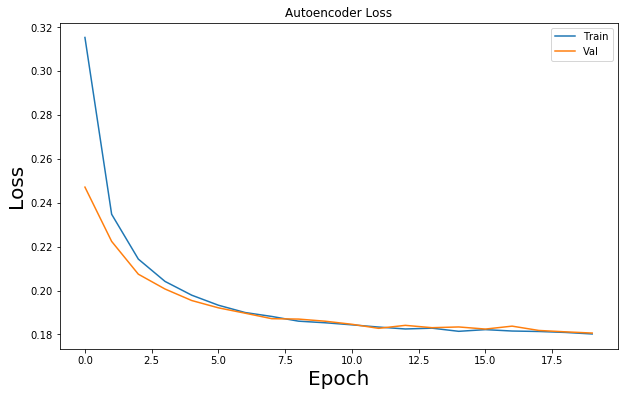

In [250]:
# Let's see how our AE did 
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(history.history['loss'], label='Train')
ax.plot(history.history['val_loss'], label='Val')
ax.set_xlabel("Epoch", fontsize=20)
ax.set_ylabel("Loss", fontsize=20)
ax.legend()
ax.set_title('Autoencoder Loss')

**1.12** [3pts] Compute the `encoder`'s latent space representation of `x_train`, calling the resulting array `ae_latent_train`. Plot the scatterplots of `pca_latent_train`, `lae_latent_train`, and `ae_latent_train` in a row using `subplots` so we can see them all simultaneously. What do you notice?


In [49]:
####### PLEASE #######################
### LOAD or RELOAD MODELS for future convenience (for consistency)
#### UNCOMMENT BELOW

encoder = tf.keras.models.load_model('models/right_ae_encoder.h5')
decoder = tf.keras.models.load_model('models/right_ae_decoder.h5')
ae = tf.keras.models.load_model('models/right_ae.h5')

In [50]:
# your code here
ae_latent_train = encoder.predict(x_train_flat)

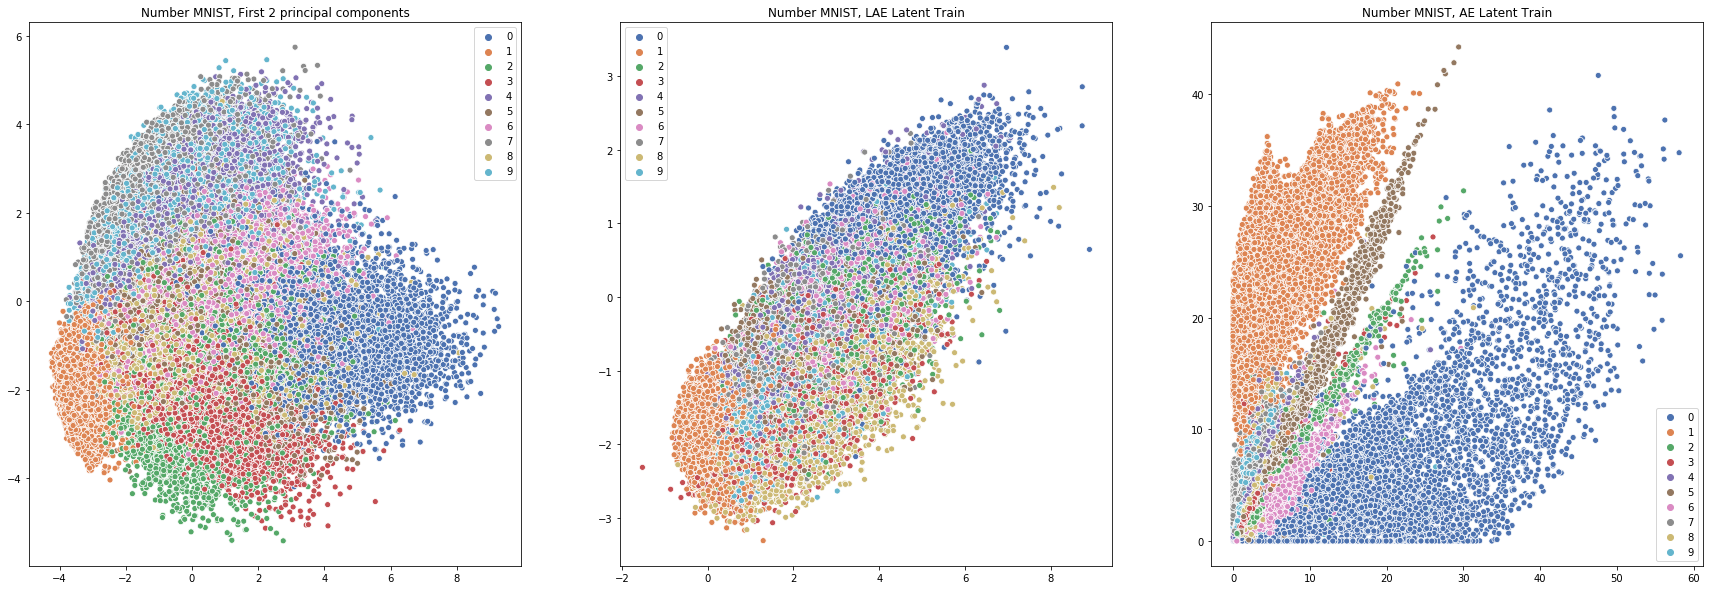

In [51]:
# your code here
np.unique(y_train)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

fig, ax = plt.subplots(1,3, figsize=(30,10))
sns.scatterplot(x=pca_latent_train[:,0], y=pca_latent_train[:,1], hue=y_train,
                palette=sns.color_palette("deep", 10),  ax=ax[0])
ax[0].set_title("Number MNIST, First 2 principal components");

sns.scatterplot(x=lae_latent_train[:,0], y=lae_latent_train[:,1], hue=y_train,
                palette=sns.color_palette("deep", 10),  ax=ax[1])
ax[1].set_title("Number MNIST, LAE Latent Train");

sns.scatterplot(x=ae_latent_train[:,0], y=ae_latent_train[:,1], hue=y_train,
                palette=sns.color_palette("deep", 10),  ax=ax[2])
ax[2].set_title("Number MNIST, AE Latent Train");

In [254]:
# ## SAVE MODELS (SAVING after checking for satisfactory plots)

# encoder.save('models/right_ae_encoder.h5')
# decoder.save('models/right_ae_decoder.h5')
# ae.save('models/right_ae.h5')

In [52]:
# ### RELOAD MODELS

encoder = tf.keras.models.load_model('models/right_ae_encoder.h5')
decoder = tf.keras.models.load_model('models/right_ae_decoder.h5')
ae = tf.keras.models.load_model('models/right_ae.h5')

*Your answer here*  
  
By the new plot, we can see that the number '1' can vary a lot.
Also, by adding more dense layers(nonlinear), the model was able to separate numbers in a more coherent fashion.

**1.13** [6pts] Comparing reconstructed images. You will create arrays containing the reconstructed `x_test` using PCA, the linear autoencoder, and the regular autoencoder. For PCA, be sure to use the `pca` object you created and fit in **1.3** on the *train* data. You will project `x_test` onto its 2D latent space representation, and then convert it back, saving the result as `pca_recons_x_test`. For the linear autoencoder and the regular autoencoder, save the reconstructed `x_test` as `lae_recons_x_test` and `ae_recons_x_test` respectively. Now, you will create a 6 row by 4 column collection of subplots. Each row will correspond to an element of the test set (of your choice), with the columns being the PCA reconstruction, the LAE reconstruction, the AE reconstruction, and the original image. Be sure to title the subplots with 'PCA', 'LAE', 'AE', 'Original'.


In [53]:
# your code here
pca_latent_test = pca_model.transform(x_test_flat)
pca_recons_x_test = pca_model.inverse_transform(pca_latent_test)
pca_recons_x_test.shape

(10000, 784)

In [54]:
lae_recons_x_test = lae.predict(x_test_flat)
lae_recons_x_test.shape

(10000, 784)

In [55]:
ae_recons_x_test = ae.predict(x_test_flat)
ae_recons_x_test.shape

(10000, 784)

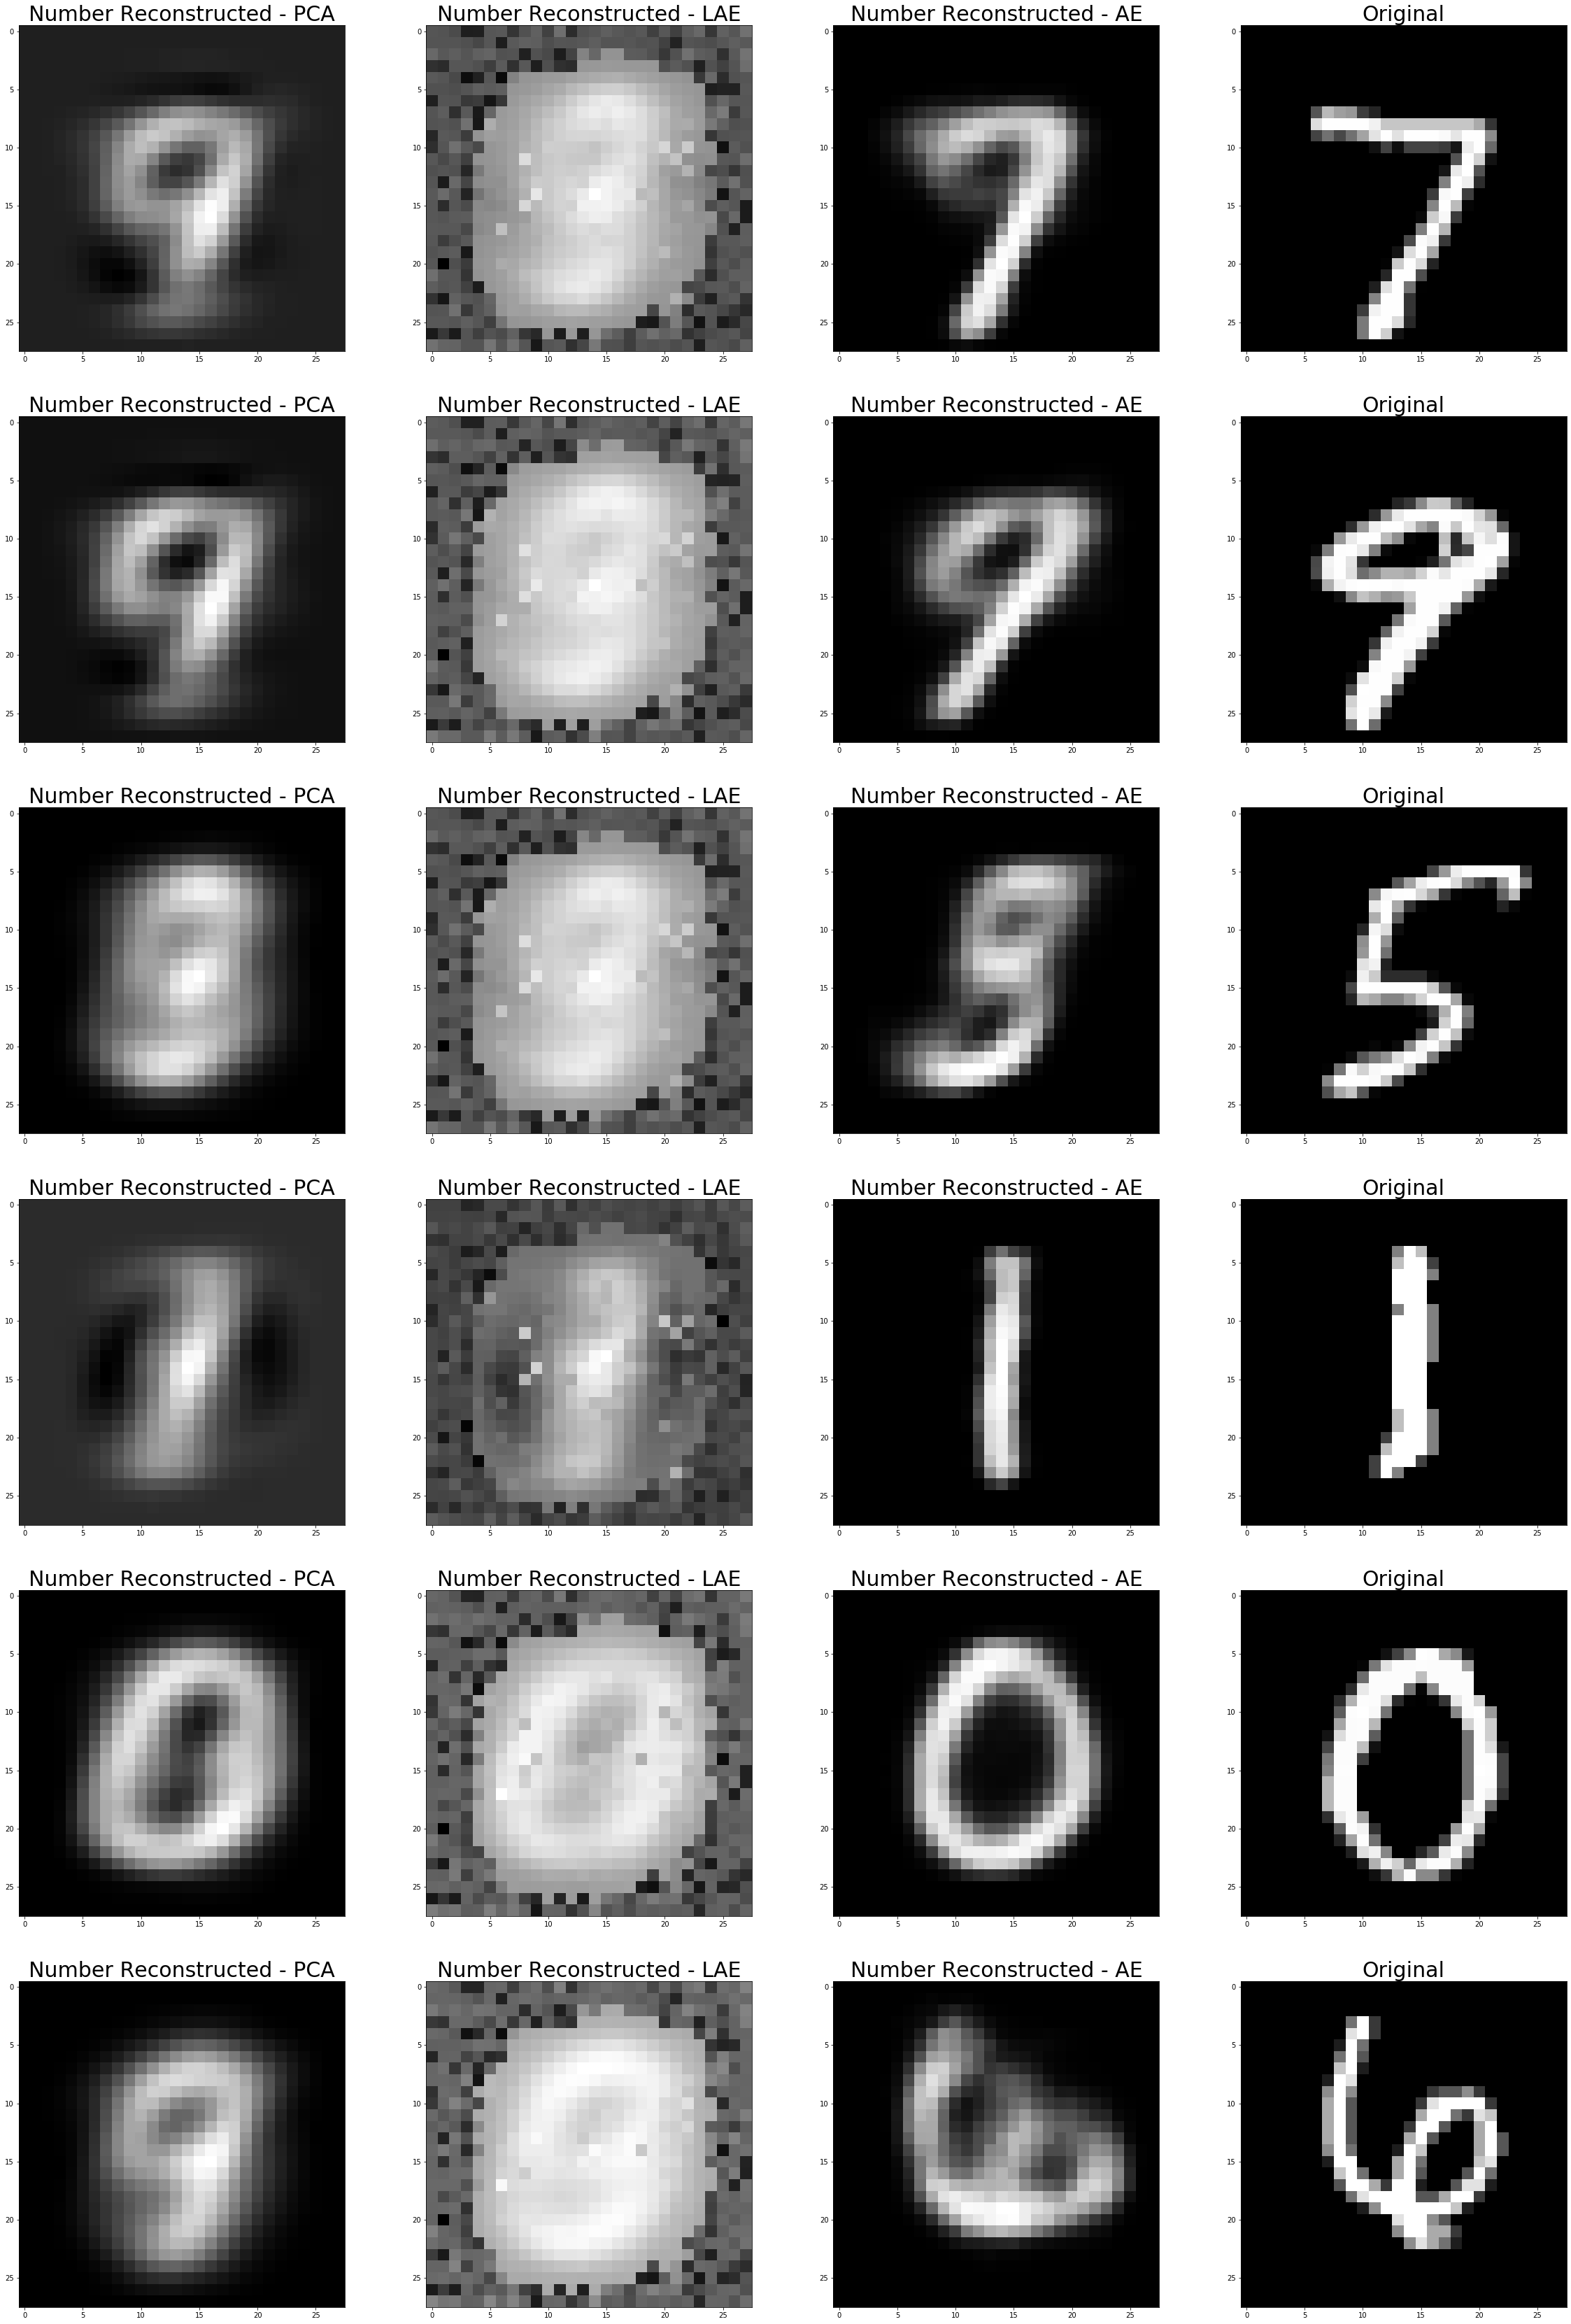

In [56]:
# your code here

title_list = ["Number Reconstructed - PCA", "Number Reconstructed - LAE", "Number Reconstructed - AE", "Original"]
imgs_id_list = [0,9,23,14,13,22]
recon_x_test_list = [pca_recons_x_test, lae_recons_x_test, ae_recons_x_test, x_test_flat]

fig, ax = plt.subplots(6,4, figsize=(40,60))

for i in range(6):
    for j in range(4):
        for k in range(4):
#             print(k,i)
#             print(i,k)
            ax[i][k].imshow(recon_x_test_list[k][imgs_id_list[i]].reshape(28,28), cmap='gray')
            ax[i][k].set_title(title_list[k], fontsize=30)
        

**1.14** [2pts] Finally, using `sklearn.metrics`'s `mean_squared_error`, report the average reconstruction error across the entire test set for PCA, LAE, and AE. Does the ordering agree with what you've seen in the previous questions? Does it support your conclusion in **1.8**?


In [261]:
# your code here
pca_mse = mean_squared_error(x_test_flat, pca_recons_x_test)
lae_mse = mean_squared_error(x_test_flat, lae_recons_x_test)
ae_mse = mean_squared_error(x_test_flat, ae_recons_x_test)

print(pca_mse)
print(lae_mse)
print(ae_mse)

0.05566949106084114
0.16301131796050142
0.039965816090151665


*Your answer here*  

The results do suggest that adding more dense layers gives somewhat better results.

<div class='exercise'><b> Question 2: Convolutional Autoencoders and Outlier Detection [50pts total] </b></div>

For this question, we will be using a modified version of a subset of MNIST. We have hidden some images of handwritten letters in the dataset `data/cs109b-mnist-mix.csv` amongst thousands of handwritten digits. The dataset is provided as a csv, where each row is an image, and each column gives the value of a given pixel in a flattened 28 by 28 image. It would be very tedious to have humans flip through every image to find the letters, so instead we will exploit a neat feature of autoencoders, outlier detection. This method turns a disadvantage of autoencoders, namely, their inability to properly reconstruct data very dissimilar to what they were trained on, into an advantage. 

You will also be constructing a convolutional autoencoder, which tends to work a lot better for reconstructing images, all while using substantially fewer parameters.

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.

**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.

**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.


## Answers

**2.1** [2pts] Load and normalize (by dividing by 255) the modified dataset from `data/cs109b-mnist-mix.csv`, and reshape it to (-1, 28, 28), saving the array as `x_cs109b`. Using `imshow` and `cmap='gray'`, plot one image of your choice from this dataset.


In [6]:
# your code here
img_path = './cs109b-mnist-mix.csv'
from numpy import genfromtxt
x_cs109b = genfromtxt(img_path, delimiter=',')
x_cs109b=x_cs109b.reshape(-1,28,28)
x_cs109b /= 255.

# Its shape is (3067, 28,28)
print(x_cs109b.shape)


(3067, 28, 28)


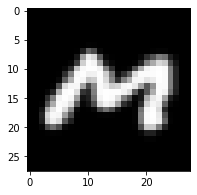

In [377]:
# your code here
from tensorflow.keras.preprocessing import image
plt.rcParams["figure.figsize"] = (3,3)

plt.imshow(x_cs109b[2990], cmap='gray')
plt.show()


**2.2** [15pts] Create a convolutional autoencoder called `cae`. This time you don't need separate references to the encoder and decoder parts since we only intend to use the full autoencoder. You may use a combination of `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `Reshape`, and `UpSampling2D` layers. You may use any number of these layers, and if you are unfamiliar with any of these layers we encourage you to look at their TF Keras documentation. You will have to experiment with an appropriate bottleneck size to complete the rest of question **2**. As always, print the `summary()` of your model.


In [13]:
# your code here

x_train_c = x_train.reshape(-1, h, w, 1)
x_test_c = x_test.reshape(-1, h, w, 1)

In [14]:
# your code here
# x_train_n = x_train.reshape(-1, h, w, 1)
# x_test_n = x_test.reshape(-1, h, w, 1)

x_train_c = x_train.reshape(-1, h, w, 1)
x_test_c = x_test.reshape(-1, h, w, 1)

n_samples2, h2, w2 = x_cs109b.shape
print(n_samples2, h2, w2)

hw2 = h2*w2
print(hw2)

3067 28 28
784


In [301]:
input_layer2 = Input(shape=(h, w, 1))

encoded_layer1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer2)
encoded_layer1 = MaxPooling2D( (2, 2), padding='same')(encoded_layer1)
encoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer1)
encoded_layer2 = MaxPooling2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view    = MaxPooling2D( (2, 2), padding='same', name='latent_view')(encoded_layer3)

# call this the "encoder", we will use it later
encoder  = Model(input_layer2, latent_view, name='encoder_model')

decoded_layer1 = Conv2D(16, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)
decoded_layer3 = Conv2D(32, (3, 3), activation='relu')(decoded_layer2)
decoded_layer3 = UpSampling2D((2, 2))(decoded_layer3)
# Note that the loss will be computed after every batch between the predicted output pixel and 
# the ground truth pixel using mean squared error pixel by pixel:
output_layer   = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded_layer3)

cae = Model(input_layer2, output_layer, name='cae_model')
cae.summary()




Model: "cae_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 7, 7, 16)          4624      
_________________________________________________________________
latent_view (MaxPooling2D)   (None, 4, 4, 16)          0 

**2.3** [10pts] Train your convolutional autoencoder on `x_train` (from **problem 1**, MNIST), using `x_test` as validation data. Plot the train/validation loss versus epoch. This will adapt the convolutional autoencoder to the type of data we expect, handwritten digits.


In [324]:
# your code here
#optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3)
#metrics = ['accuracy'] 
#
#
#cae.compile(optimizer=optimizer,
#              loss='mean_squared_error',
#              metrics=metrics)
#
#batch_size = 128
#epochs = 20 # 2 for testing // more for HW
#
#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#callbacks = [ tf.keras.callbacks.EarlyStopping(
#                    # Stop training when `val_loss` is no longer improving
#                    monitor='val_loss',
#                    # "no longer improving" being further defined as "for at least `patience` epochs
#                    patience=10,
#                    verbose=5, mode='auto'),
#             tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
#            ]
#
#history = cae.fit(x_train_c, x_train_c, epochs=epochs, batch_size=batch_size, 
#                      validation_data=(x_test_c, x_test_c), callbacks=callbacks)
#

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.0089 - accuracy: 0.8141 - val_loss: 0.0081 - val_accuracy: 0.8130
Epoch 2/20
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.0085 - accuracy: 0.8142 - val_loss: 0.0079 - val_accuracy: 0.8131
Epoch 3/20
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0083 - accuracy: 0.8143 - val_loss: 0.0080 - val_accuracy: 0.8136
Epoch 4/20
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0081 - accuracy: 0.8143 - val_loss: 0.0074 - val_accuracy: 0.8132
Epoch 5/20
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0079 - accuracy: 0.8144 - val_loss: 0.0082 - val_accuracy: 0.8130
Epoch 6/20
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.0077 - accuracy: 0.8144 - val_loss: 0.0086 - val_accuracy: 0.8139
Epoch 7/20
60000/60000 [==============================] 

In [319]:
## SAVE MODELS (SAVING after checking for satisfactory plots)

#cae.save('models/right_cae2.h5')

In [382]:
# ### RELOAD MODELS

cae = tf.keras.models.load_model('models/right_cae2.h5')

Text(0.5, 1.0, 'CAE -- Autoencoder Loss')

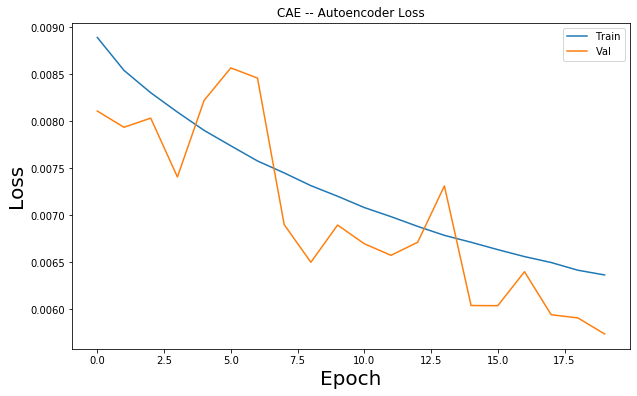

In [383]:
# your code here
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(history.history['loss'], label='Train')
ax.plot(history.history['val_loss'], label='Val')
ax.set_xlabel("Epoch", fontsize=20)
ax.set_ylabel("Loss", fontsize=20)
ax.legend()
ax.set_title('CAE -- Autoencoder Loss')

**2.4** [4pts] Pass `x_test` through your convolutional autoencoder (CAE), calling the resulting reconstruction of the dataset `cae_recons_x_test`. To see how well your CAE is performing, we will visually inspect some of its reconstructions. Make an array of subplots of 6 rows and 2 columns, with the rows being different elements of the test set (your choice) and the columns being the CAE reconstruction and the Original image. How good is the reconstruction? How does it compare to the reconstruction of your dense autoencoder from **1.13**?


In [384]:
####### PLEASE #######################
### LOAD or RELOAD MODELS for future convenience (for consistency)
#### UNCOMMENT BELOW

cae = tf.keras.models.load_model('models/right_cae2.h5')

In [385]:
# your code here
cae_recons_x_test = cae.predict(x_test_c)
cae_recons_x_test.shape

(10000, 28, 28, 1)

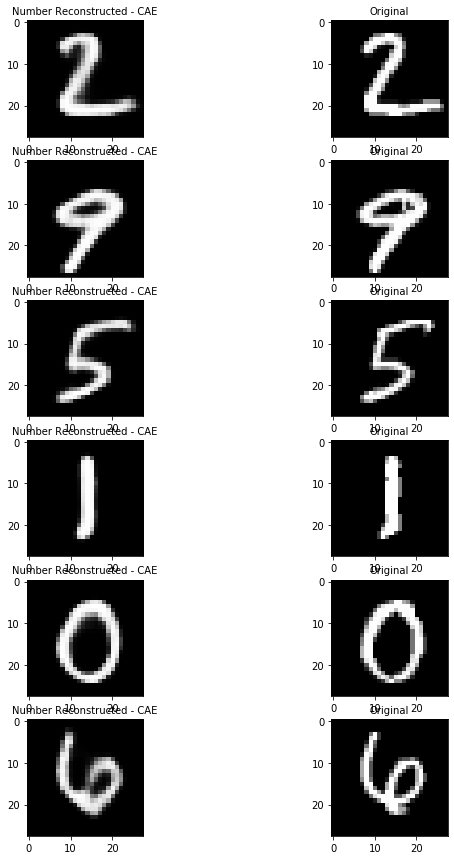

In [386]:
# your code here
title_list = ["Number Reconstructed - CAE","Original"]
imgs_id_list = [1,9,23,14,13,22]
recon_x_test_list = [cae_recons_x_test, x_test_c]

fig, ax = plt.subplots(6,2, figsize=(10,15))

for i in range(6):
    for j in range(4):
        for k in range(2):
#             print(k,i)
#             print(i,k)
            ax[i][k].imshow(recon_x_test_list[k][imgs_id_list[i]].reshape(28,28), cmap='gray')
            ax[i][k].set_title(title_list[k], fontsize=10)

*Your answer here*

The fit looks really good compared to the original image and other models. Compared to the original image, the reconstruction is a little less focused and removes marks that are outside the normal images. For instance, the 6 has a piece hanging below the bottom of the 6, but this is removed in the reconstruction. The model looks most similar to the AE modoel but is much closer to the original image. 

**2.5** [4pts] Construct an instance of `tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)` and use it to calculate the MSE reconstruction error of every element in `x_test`. Save this array as `mse_x_test`; you want this output to be a 1D array so consider the required shapes of what you feed in to the `MeanSquaredError` object. We will now pass the mystery dataset through the CAE: reconstruct `x_cs109b`, saving the result as `cae_recons_x_cs109b`. Compute the reconstruction errors, saving the result as `mse_x_cs109b`.


In [348]:
# your code here
# your code here
# from this site: 
#  https://www.tensorflow.org/guide/keras/custom_layers_and_models

cae_recons_x_test_flat = cae_recons_x_test.reshape(10000,784)
x_test_c_flat = x_test_c.reshape(10000,784)
x_test_1d = x_test_c_flat.reshape(-1)

mse_loss_fn = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)

mse_x_test = mse_loss_fn(x_test_c_flat, cae_recons_x_test_flat)



In [349]:
cae_recons_x_test_flat = cae_recons_x_test.reshape(10000, 784)
cae_recons_x_test_flat.shape

x_test_1d = x_test_flat.reshape(-1)

mse_loss_fn = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
# mse_x_test = mse_loss_fn(x_test_1d, cae_recons_x_test_1d)
mse_x_test = mse_loss_fn(x_test_flat, cae_recons_x_test_flat)

print('Loss: ', mse_x_test.numpy())  

Loss:  [0.00383119 0.0087849  0.00177291 ... 0.00590001 0.00858509 0.01337128]


In [350]:
# your code here
x_cs109b_c = x_cs109b.reshape(-1, h2, w2, 1)
print(x_cs109b_c.shape)


cae_recons_x_cs109b = cae.predict(x_cs109b_c)
print(cae_recons_x_cs109b.shape)

(3067, 28, 28, 1)
(3067, 28, 28, 1)


In [351]:
x_cs109b_flat = x_cs109b.reshape(n_samples2, hw2)
x_cs109b_flat.shape

(3067, 784)

In [352]:
cae_recons_x_cs109b_flat = cae_recons_x_cs109b.reshape(n_samples2, 784)
cae_recons_x_cs109b_flat.shape

(3067, 784)

In [353]:
# your code here
mse_x_cs109b = mse_loss_fn(x_cs109b_flat, cae_recons_x_cs109b_flat)
print('Loss: ', mse_x_cs109b.numpy())  

Loss:  [0.00383119 0.00855967 0.010449   ... 0.01287726 0.00862447 0.00739915]


**2.6** [5pts] Using subplots, plot the histograms of `mse_x_test` and `mse_x_cs109b` side-by-side. For the most part, do they look like they are coming from similar types of data? Pick a reasonable threshold value for reconstruction error based on the histogram for `mse_x_cs109b`; plot this threshold as a vertical line on the histogram. Be sure to explain your choice of threshold. Beyond this threshold, you will examine the images to see if you can find letters. Print how many images lie beyond this threshold.


In [376]:
# your code here

### CALCULATE % below TH for mse_x_test

mse_x_test_list = []

for item in mse_x_test.numpy():
    mse_x_test_list.append(item)
    
i=0

for idx in range(len(mse_x_test_list)):
    i += mse_x_test_list[idx]<0.025
    
print('Number of images beyond TH')
print(len(mse_x_test_list)-i)
print('Percent')
perc_below_test = i/len(mse_x_test_list)
print(perc_below_test)

####
### CALCULATE % below TH for mse_x_cs109b

mse_x_cs109b_list = []

for item in mse_x_cs109b.numpy():
    mse_x_cs109b_list.append(item)
    
i=0

for idx in range(len(mse_x_cs109b_list)):
    i += mse_x_test_list[idx]<0.025
    
print('Number of images beyond TH')
print(len(mse_x_cs109b_list)-i)
print('Percent')
perc_below_test_cs109 = i/len(mse_x_cs109b_list)
print(perc_below_test_cs109)

Number of images beyond TH
34
Percent
0.9966
Number of images beyond TH
15
Percent
0.9951092272579067


Text(0.5, 1.0, 'MSE-x_test(1.0 below TH)')

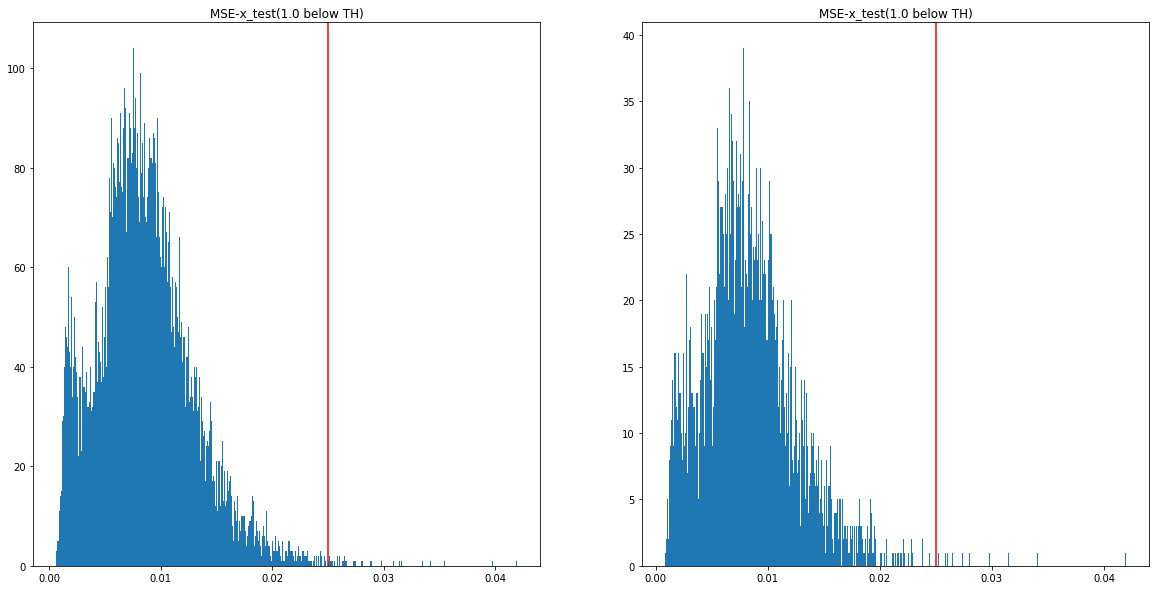

In [370]:
# your code here

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].hist(mse_x_test, bins=500)
ax[0].axvline(0.025, color='red')
ax0_title = 'MSE-x_test(' + str(perc_below_test) + ' below TH)'
ax[0].set_title(ax0_title)

ax[1].hist(mse_x_cs109b, bins = 500)
ax[1].axvline(0.025, color='red')
ax1_title = 'MSE-x_test(' + str(perc_below_test_cs109) + ' below TH)'
ax[1].set_title(ax1_title)


*Your answer here*

The look like they are coming from very similar datasets. There are two peaks, genearlly with an early one and a bigger second one. Both have a longer tail to the right, with a number of uotliers above 0.025. 

**2.7** [10pts] Use the subset of data determined by your threshold to find the letters in `x_cs109b`, displaying them as images. Show your work! Create a 2-column table indicating the letter (e.g., 'a') and the index where it is located (e.g. '9728'). There are a few letters total. To get full credit you need to find most of them (you should not need to examine more than a few tens of images - if so, consider a different threshold in **2.6** or check your CAE performance).

You will have been able to find the majority of the letters hidden in the dataset of thousands of images, while only having to manually look at 1/100th of the dataset. This demonstrates how autoencoders could be used as a cheap preprocessing step to draw out the most "interesting" data.

In [356]:

import pandas as pd
error_df = pd.DataFrame({"ID":range(len(mse_x_cs109b_list)),
                        "MSE":mse_x_cs109b_list
                                   })

error_df = error_df.sort_values(["MSE"],ascending=False)
error_df.head()

,ID,MSE
2231,2231,0.041976
1934,1934,0.034127
2234,2234,0.031447
910,910,0.029746
1746,1746,0.028027


In [357]:
cae_recons_x_cs109b_27 = cae.predict(x_cs109b_c)


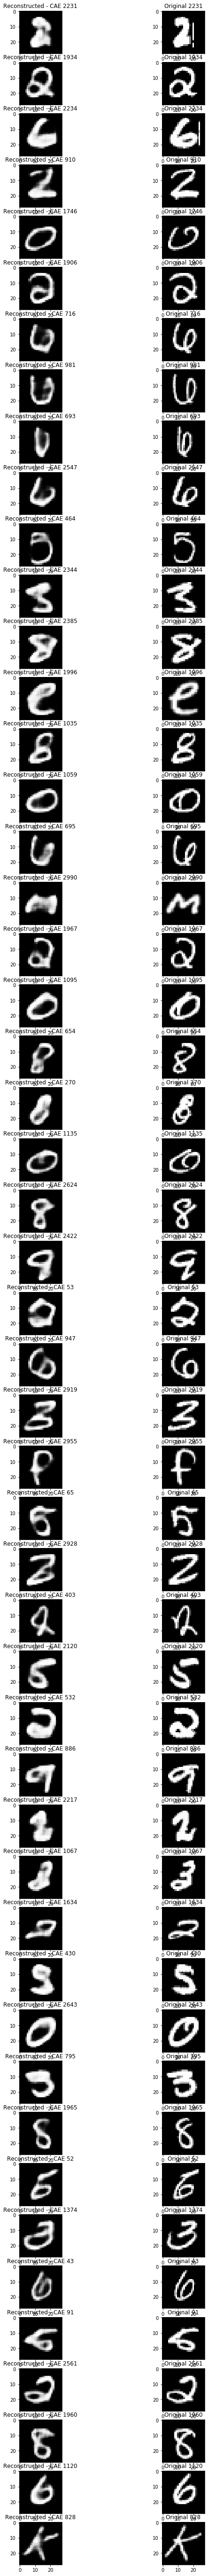

In [381]:
# your code here

#looking at top 50 to find any letters in the dataset

fig, ax = plt.subplots(50,2, figsize=(10,100))

for i, idx in zip(range(0,50),error_df.ID):
    ax[i][0].imshow(cae_recons_x_cs109b_27[idx][:,:,0], cmap='gray')
    ax[i][0].set_title('Reconstructed - CAE ' + str(idx))
    ax[i][1].imshow(x_cs109b[idx], cmap='gray')
    ax[i][1].set_title('Original ' + str(idx))


     id letter
0  2990      m
1  2955      f
2   828      k
3  1996      e


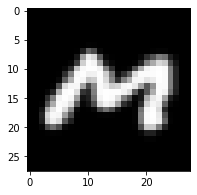

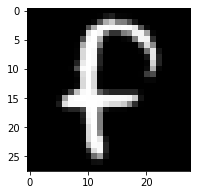

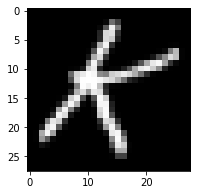

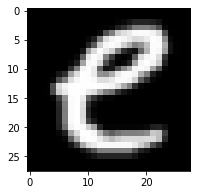

,id,letter
0,2990,m
1,2955,f
2,828,k
3,1996,e


In [379]:
#4 letters found in top 50

letter_list = ['m','f','k','e']
id_list = [2990,2955,828, 1996]

final_letter_df = pd.DataFrame({"id":id_list,"letter":letter_list})

print(final_letter_df)

plt.imshow(x_cs109b[2990], cmap='gray')
plt.show()

plt.imshow(x_cs109b[2955], cmap='gray')
plt.show()

plt.imshow(x_cs109b[828], cmap='gray')
plt.show()

plt.imshow(x_cs109b[1996], cmap='gray')
plt.show()

final_letter_df

*Your answer here*

From looking at the top 50 images by MSE, we were able to identify 4 letters that should not be in the dataset. These are:


| ID | Letter|
|--| ---------|
| 2990 | M|
| 2955 | F |
| 828 | K |
| 1996 | E |